# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [28]:
import pandas as pd
import matplotlib.pyplot as plt


# Notebook Presentation

In [29]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [30]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [31]:
# 1. How many rows and columns does the dataset contain?
print(f"Dataset shape: {data.shape}")
print(f"Rows: {data.shape[0]}, Columns: {data.shape[1]}")

# 2. Are there any NaN values present?
print(f"\nNaN values per column:")
print(data.isnull().sum())

# 3. Are there any duplicate rows?
print(f"\nDuplicate rows: {data.duplicated().sum()}")

# 4. What are the data types of the columns?
print(f"\nData types:")
print(data.dtypes)


Dataset shape: (5391, 6)
Rows: 5391, Columns: 6

NaN values per column:
Rank                     0
Release_Date             0
Movie_Title              0
USD_Production_Budget    0
USD_Worldwide_Gross      0
USD_Domestic_Gross       0
dtype: int64

Duplicate rows: 0

Data types:
Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget    object
USD_Worldwide_Gross      object
USD_Domestic_Gross       object
dtype: object


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [32]:
# Convert USD columns to numeric format by removing $ signs and commas
data['USD_Production_Budget'] = data['USD_Production_Budget'].astype(str).str.replace('$', '').str.replace(',', '').astype(float)
data['USD_Worldwide_Gross'] = data['USD_Worldwide_Gross'].astype(str).str.replace('$', '').str.replace(',', '').astype(float)
data['USD_Domestic_Gross'] = data['USD_Domestic_Gross'].astype(str).str.replace('$', '').str.replace(',', '').astype(float)

# Verify the conversion
print("Data types after conversion:")
print(data[['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']].dtypes)
print("\nSample values:")
print(data[['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']].head())


Data types after conversion:
USD_Production_Budget    float64
USD_Worldwide_Gross      float64
USD_Domestic_Gross       float64
dtype: object

Sample values:
   USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross
0             110,000.00        11,000,000.00       10,000,000.00
1             385,907.00                 0.00                0.00
2             200,000.00         8,000,000.00        8,000,000.00
3             100,000.00         3,000,000.00        3,000,000.00
4             245,000.00        22,000,000.00       11,000,000.00


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [33]:
# Convert Release_Date to Pandas Datetime type
data['Release_Date'] = pd.to_datetime(data['Release_Date'])

# Verify the conversion
print("Release_Date data type:", data['Release_Date'].dtype)
print("\nSample dates:")
print(data['Release_Date'].head())
print(f"\nDate range: {data['Release_Date'].min()} to {data['Release_Date'].max()}")


Release_Date data type: datetime64[ns]

Sample dates:
0   1915-08-02
1   1916-05-09
2   1916-12-24
3   1920-09-17
4   1925-01-01
Name: Release_Date, dtype: datetime64[ns]

Date range: 1915-08-02 00:00:00 to 2020-12-31 00:00:00


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [34]:
# 1. What is the average production budget of the films in the data set?
avg_budget = data['USD_Production_Budget'].mean()
print(f"1. Average production budget: ${avg_budget:,.2f}")

# 2. What is the average worldwide gross revenue of films?
avg_worldwide_gross = data['USD_Worldwide_Gross'].mean()
print(f"2. Average worldwide gross revenue: ${avg_worldwide_gross:,.2f}")

# 3. What were the minimums for worldwide and domestic revenue?
min_worldwide = data['USD_Worldwide_Gross'].min()
min_domestic = data['USD_Domestic_Gross'].min()
print(f"3. Minimum worldwide revenue: ${min_worldwide:,.2f}")
print(f"   Minimum domestic revenue: ${min_domestic:,.2f}")

# 4. Are the bottom 25% of films actually profitable or do they lose money?
bottom_25_percent = data['USD_Production_Budget'].quantile(0.25)
bottom_25_films = data[data['USD_Production_Budget'] <= bottom_25_percent]
profitable_films = bottom_25_films[bottom_25_films['USD_Worldwide_Gross'] > bottom_25_films['USD_Production_Budget']]
profit_percentage = (len(profitable_films) / len(bottom_25_films)) * 100
print(f"4. Bottom 25% films profitability: {profit_percentage:.1f}% are profitable")

# 5. What are the highest production budget and highest worldwide gross revenue of any film?
max_budget = data['USD_Production_Budget'].max()
max_worldwide_gross = data['USD_Worldwide_Gross'].max()
print(f"5. Highest production budget: ${max_budget:,.2f}")
print(f"   Highest worldwide gross revenue: ${max_worldwide_gross:,.2f}")

# 6. How much revenue did the lowest and highest budget films make?
lowest_budget_film = data.loc[data['USD_Production_Budget'].idxmin()]
highest_budget_film = data.loc[data['USD_Production_Budget'].idxmax()]
print(f"6. Lowest budget film revenue: ${lowest_budget_film['USD_Worldwide_Gross']:,.2f}")
print(f"   Highest budget film revenue: ${highest_budget_film['USD_Worldwide_Gross']:,.2f}")


1. Average production budget: $31,113,737.58
2. Average worldwide gross revenue: $88,855,421.96
3. Minimum worldwide revenue: $0.00
   Minimum domestic revenue: $0.00
4. Bottom 25% films profitability: 48.4% are profitable
5. Highest production budget: $425,000,000.00
   Highest worldwide gross revenue: $2,783,918,982.00
6. Lowest budget film revenue: $181,041.00
   Highest budget film revenue: $2,783,918,982.00


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [35]:
# How many films grossed $0 domestically?
zero_domestic = data[data['USD_Domestic_Gross'] == 0]
print(f"Number of films with $0 domestic revenue: {len(zero_domestic)}")

# What were the highest budget films that grossed nothing domestically?
highest_budget_zero_domestic = zero_domestic.nlargest(10, 'USD_Production_Budget')
print(f"\nTop 10 highest budget films with $0 domestic revenue:")
print(highest_budget_zero_domestic[['Movie_Title', 'Release_Date', 'USD_Production_Budget', 'USD_Domestic_Gross', 'USD_Worldwide_Gross']])


Number of films with $0 domestic revenue: 512

Top 10 highest budget films with $0 domestic revenue:
                                       Movie_Title Release_Date  \
5388                                   Singularity   2020-12-31   
5387                                       Aquaman   2018-12-18   
5384                             A Wrinkle in Time   2018-09-03   
5385                                Amusement Park   2018-10-08   
5090            Don Gato, el inicio de la pandilla   2015-12-31   
4294  Astérix et Obélix: Au service de Sa Majesté    2012-12-31   
5058                              The Ridiculous 6   2015-11-12   
5338                                The Dark Tower   2017-04-08   
5389                        Hannibal the Conqueror   2020-12-31   
4295                                    Foodfight!   2012-12-31   

      USD_Production_Budget  USD_Domestic_Gross  USD_Worldwide_Gross  
5388         175,000,000.00                0.00                 0.00  
5387         160,00

**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [36]:
# How many films grossed $0 worldwide?
zero_worldwide = data[data['USD_Worldwide_Gross'] == 0]
print(f"Number of films with $0 worldwide revenue: {len(zero_worldwide)}")

# What are the highest budget films that had no revenue internationally?
highest_budget_zero_worldwide = zero_worldwide.nlargest(10, 'USD_Production_Budget')
print(f"\nTop 10 highest budget films with $0 worldwide revenue:")
print(highest_budget_zero_worldwide[['Movie_Title', 'Release_Date', 'USD_Production_Budget', 'USD_Domestic_Gross', 'USD_Worldwide_Gross']])


Number of films with $0 worldwide revenue: 357

Top 10 highest budget films with $0 worldwide revenue:
                 Movie_Title Release_Date  USD_Production_Budget  \
5388             Singularity   2020-12-31         175,000,000.00   
5387                 Aquaman   2018-12-18         160,000,000.00   
5384       A Wrinkle in Time   2018-09-03         103,000,000.00   
5385          Amusement Park   2018-10-08         100,000,000.00   
5058        The Ridiculous 6   2015-11-12          60,000,000.00   
5338          The Dark Tower   2017-04-08          60,000,000.00   
5389  Hannibal the Conqueror   2020-12-31          50,000,000.00   
5092                The Crow   2015-12-31          40,000,000.00   
3300     Black Water Transit   2008-12-31          35,000,000.00   
5045        Freaks of Nature   2015-10-30          33,000,000.00   

      USD_Domestic_Gross  USD_Worldwide_Gross  
5388                0.00                 0.00  
5387                0.00                 0.00  
5384

### Filtering on Multiple Conditions

In [37]:
# Filter for international releases that had some worldwide gross revenue, but made zero revenue in the United States
international_releases = data[(data['USD_Worldwide_Gross'] > 0) & (data['USD_Domestic_Gross'] == 0)]

print(f"Number of international releases with zero domestic revenue: {len(international_releases)}")
print(f"\nTop 10 highest budget international releases:")
print(international_releases.nlargest(10, 'USD_Production_Budget')[['Movie_Title', 'Release_Date', 'USD_Production_Budget', 'USD_Domestic_Gross', 'USD_Worldwide_Gross']])


Number of international releases with zero domestic revenue: 155

Top 10 highest budget international releases:
                                       Movie_Title Release_Date  \
5090            Don Gato, el inicio de la pandilla   2015-12-31   
4294  Astérix et Obélix: Au service de Sa Majesté    2012-12-31   
4295                                    Foodfight!   2012-12-31   
2836               Les Bronzés 3: amis pour la vie   2006-12-31   
5091              Pourquoi j'ai pas mangé mon père   2015-12-31   
4371                           Un monstre à Paris    2013-04-16   
4763                    Dragon Nest Warriors' Dawn   2014-12-31   
5271              USS Indianapolis: Men of Courage   2016-11-11   
3208                              Virgin Territory   2008-08-26   
3539                              Obitaemyy ostrov   2009-12-31   

      USD_Production_Budget  USD_Domestic_Gross  USD_Worldwide_Gross  
5090          80,000,000.00                0.00         4,547,660.00  
4294    

**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [38]:
# Use .query() function to accomplish the same filtering
international_releases_query = data.query('USD_Worldwide_Gross > 0 and USD_Domestic_Gross == 0')

print(f"Number of international releases with zero domestic revenue (using .query()): {len(international_releases_query)}")
print(f"\nTop 10 highest budget international releases:")
print(international_releases_query.nlargest(10, 'USD_Production_Budget')[['Movie_Title', 'Release_Date', 'USD_Production_Budget', 'USD_Domestic_Gross', 'USD_Worldwide_Gross']])


Number of international releases with zero domestic revenue (using .query()): 155

Top 10 highest budget international releases:
                                       Movie_Title Release_Date  \
5090            Don Gato, el inicio de la pandilla   2015-12-31   
4294  Astérix et Obélix: Au service de Sa Majesté    2012-12-31   
4295                                    Foodfight!   2012-12-31   
2836               Les Bronzés 3: amis pour la vie   2006-12-31   
5091              Pourquoi j'ai pas mangé mon père   2015-12-31   
4371                           Un monstre à Paris    2013-04-16   
4763                    Dragon Nest Warriors' Dawn   2014-12-31   
5271              USS Indianapolis: Men of Courage   2016-11-11   
3208                              Virgin Territory   2008-08-26   
3539                              Obitaemyy ostrov   2009-12-31   

      USD_Production_Budget  USD_Domestic_Gross  USD_Worldwide_Gross  
5090          80,000,000.00                0.00         4,547,

### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [39]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [40]:
# Identify which films were not released yet as of May 1st, 2018
unreleased_films = data[data['Release_Date'] > scrape_date]

print(f"Number of films not yet released as of May 1st, 2018: {len(unreleased_films)}")
print(f"\nUnreleased films:")
print(unreleased_films[['Movie_Title', 'Release_Date', 'USD_Production_Budget']].sort_values('Release_Date'))

# Create data_clean that does not include unreleased films
data_clean = data[data['Release_Date'] <= scrape_date].copy()
print(f"\nOriginal dataset size: {len(data)}")
print(f"Clean dataset size (excluding unreleased films): {len(data_clean)}")


Number of films not yet released as of May 1st, 2018: 7

Unreleased films:
                         Movie_Title Release_Date  USD_Production_Budget
5384               A Wrinkle in Time   2018-09-03         103,000,000.00
5385                  Amusement Park   2018-10-08         100,000,000.00
5386                             Meg   2018-10-08          15,000,000.00
5387                         Aquaman   2018-12-18         160,000,000.00
5388                     Singularity   2020-12-31         175,000,000.00
5389          Hannibal the Conqueror   2020-12-31          50,000,000.00
5390  Story of Bonnie and Clyde, The   2020-12-31          20,000,000.00

Original dataset size: 5391
Clean dataset size (excluding unreleased films): 5384


### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [41]:
# Calculate percentage of films where production costs exceeded worldwide gross revenue
films_lost_money = data_clean[data_clean['USD_Production_Budget'] > data_clean['USD_Worldwide_Gross']]
percentage_lost_money = (len(films_lost_money) / len(data_clean)) * 100

print(f"Number of films that lost money: {len(films_lost_money)}")
print(f"Percentage of films that lost money: {percentage_lost_money:.1f}%")
print(f"\nTop 10 biggest losses:")
biggest_losses = films_lost_money.copy()
biggest_losses['Loss'] = biggest_losses['USD_Production_Budget'] - biggest_losses['USD_Worldwide_Gross']
print(biggest_losses.nlargest(10, 'Loss')[['Movie_Title', 'Release_Date', 'USD_Production_Budget', 'USD_Worldwide_Gross', 'Loss']])


Number of films that lost money: 2007
Percentage of films that lost money: 37.3%

Top 10 biggest losses:
                                      Movie_Title Release_Date  \
5366  Valerian and the City of a Thousand Planets   2017-07-21   
4028                              Mars Needs Moms   2011-11-03   
1608                               Town & Country   2001-04-27   
1860                 The Adventures of Pluto Nash   2002-08-16   
5341                                  The Promise   2017-04-21   
5090           Don Gato, el inicio de la pandilla   2015-12-31   
2376                           A Sound of Thunder   2005-02-09   
830                              Cutthroat Island   1995-12-22   
1443           Fantasia 2000 (Theatrical Release)   2000-06-16   
3796                             How Do You Know?   2010-12-17   

      USD_Production_Budget  USD_Worldwide_Gross           Loss  
5366         180,000,000.00        52,573,132.00 127,426,868.00  
4028         150,000,000.00        3

# Seaborn for Data Viz: Bubble Charts

In [42]:
import seaborn as sns

# Set the style for seaborn plots
sns.set_style("darkgrid")

# Prepare data for bubble chart
# Convert budget and revenue to millions for better readability
data_clean['Budget_Millions'] = data_clean['USD_Production_Budget'] / 1_000_000
data_clean['Revenue_Millions'] = data_clean['USD_Worldwide_Gross'] / 1_000_000

print("Data prepared for bubble chart visualization")
print(f"Budget range: ${data_clean['Budget_Millions'].min():.1f}M - ${data_clean['Budget_Millions'].max():.1f}M")
print(f"Revenue range: ${data_clean['Revenue_Millions'].min():.1f}M - ${data_clean['Revenue_Millions'].max():.1f}M")


Data prepared for bubble chart visualization
Budget range: $0.0M - $425.0M
Revenue range: $0.0M - $2783.9M


### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



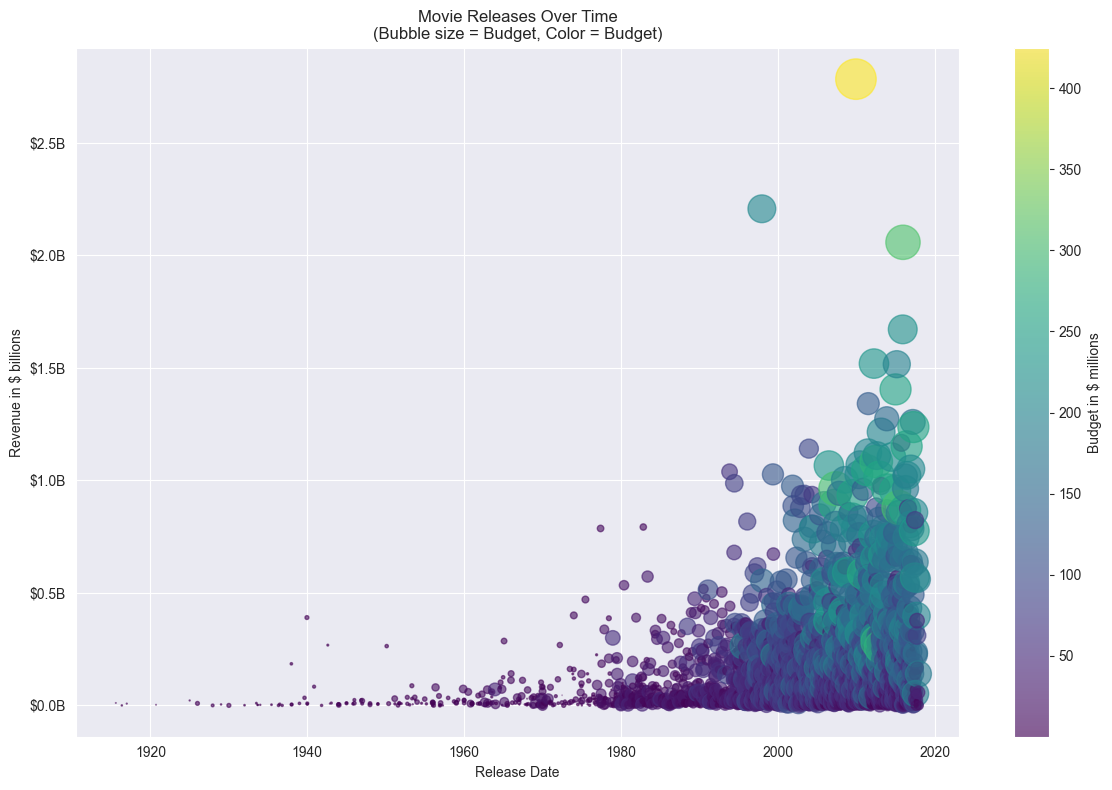

In [43]:
# Create bubble chart showing movie releases over time
plt.figure(figsize=(12, 8))

# Create scatter plot with bubble sizes based on budget
scatter = plt.scatter(data_clean['Release_Date'], 
                     data_clean['Revenue_Millions'], 
                     s=data_clean['Budget_Millions'] * 2,  # Bubble size based on budget
                     alpha=0.6,
                     c=data_clean['Budget_Millions'],  # Color based on budget
                     cmap='viridis')

# Customize the plot
plt.xlabel('Release Date')
plt.ylabel('Revenue in $ billions')
plt.title('Movie Releases Over Time\n(Bubble size = Budget, Color = Budget)')

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Budget in $ millions')

# Format y-axis to show billions
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.1f}B'))

# Show the plot
plt.tight_layout()
plt.show()


# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [44]:
# Create a column in data_clean that has the decade of the release
# 1. Create a DatetimeIndex object from the Release_Date column
date_index = pd.DatetimeIndex(data_clean['Release_Date'])

# 2. Grab all the years from the DatetimeIndex object using the .year property
years = date_index.year

# 3. Use floor division // to convert the year data to the decades of the films
decades = (years // 10) * 10

# 4. Add the decades as a Decade column to the data_clean DataFrame
data_clean['Decade'] = decades

# Verify the decades column
print("Decades created successfully!")
print(f"Decade range: {data_clean['Decade'].min()} - {data_clean['Decade'].max()}")
print(f"\nFilms per decade:")
print(data_clean['Decade'].value_counts().sort_index())


Decades created successfully!
Decade range: 1910 - 2010

Films per decade:
Decade
1910       3
1920       5
1930      16
1940      22
1950      39
1960      68
1970     109
1980     294
1990     817
2000    2181
2010    1830
Name: count, dtype: int64


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [45]:
# Create two new DataFrames: old_films and new_films
# old_films should include all the films before 1969 (up to and including 1969)
old_films = data_clean[data_clean['Decade'] <= 1960].copy()

# new_films should include all the films from 1970 onwards
new_films = data_clean[data_clean['Decade'] >= 1970].copy()

print(f"Number of films released prior to 1970: {len(old_films)}")
print(f"Number of films released from 1970 onwards: {len(new_films)}")

# What was the most expensive film made prior to 1970?
most_expensive_old = old_films.loc[old_films['USD_Production_Budget'].idxmax()]
print(f"\nMost expensive film made prior to 1970:")
print(f"Title: {most_expensive_old['Movie_Title']}")
print(f"Release Date: {most_expensive_old['Release_Date'].strftime('%Y-%m-%d')}")
print(f"Production Budget: ${most_expensive_old['USD_Production_Budget']:,.2f}")
print(f"Worldwide Gross: ${most_expensive_old['USD_Worldwide_Gross']:,.2f}")


Number of films released prior to 1970: 153
Number of films released from 1970 onwards: 5231

Most expensive film made prior to 1970:
Title: Cleopatra
Release Date: 1963-12-06
Production Budget: $42,000,000.00
Worldwide Gross: $71,000,000.00


# Seaborn Regression Plots

In [46]:
# Setup for regression plots
# Convert budget and revenue to appropriate units for visualization
old_films['Budget_Millions'] = old_films['USD_Production_Budget'] / 1_000_000
old_films['Revenue_Millions'] = old_films['USD_Worldwide_Gross'] / 1_000_000

new_films['Budget_Millions'] = new_films['USD_Production_Budget'] / 1_000_000
new_films['Revenue_Millions'] = new_films['USD_Worldwide_Gross'] / 1_000_000

print("Data prepared for regression analysis")
print(f"Old films: {len(old_films)} movies")
print(f"New films: {len(new_films)} movies")


Data prepared for regression analysis
Old films: 153 movies
New films: 5231 movies


**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

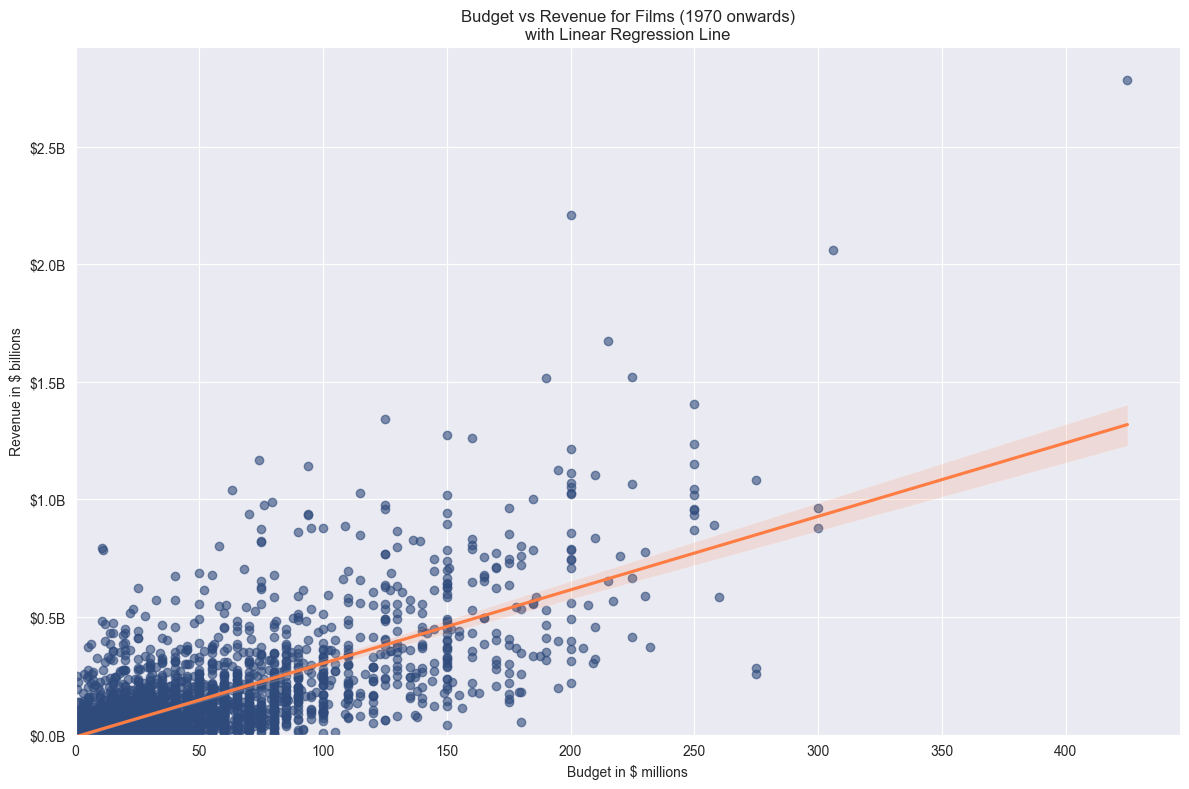

Interpretation:
- The data points for new films show a moderate positive correlation between budget and revenue
- The regression line suggests that higher budgets generally lead to higher revenues
- However, there's significant scatter around the line, indicating budget is not the only factor
- Roughly, a film with a $150 million budget would make around $300-400 million according to the regression line


In [47]:
# Use Seaborn's .regplot() to show the scatter plot and linear regression line against the new_films
plt.figure(figsize=(12, 8))

# Create regression plot with specified styling
reg_plot = sns.regplot(data=new_films, 
                      x='Budget_Millions', 
                      y='Revenue_Millions',
                      scatter_kws={'color': '#2f4b7c', 'alpha': 0.6},  # Dark blue dots
                      line_kws={'color': '#ff7c43'})  # Orange regression line

# Style the chart - remove the problematic plt.style.use line
plt.xlim(0, None)  # Set limits so they don't show negative values
plt.ylim(0, None)

# Label the axes
plt.xlabel('Budget in $ millions')
plt.ylabel('Revenue in $ billions')

# Format y-axis to show billions
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.1f}B'))

# Add title
plt.title('Budget vs Revenue for Films (1970 onwards)\nwith Linear Regression Line')

plt.tight_layout()
plt.show()

# Interpretation
print("Interpretation:")
print("- The data points for new films show a moderate positive correlation between budget and revenue")
print("- The regression line suggests that higher budgets generally lead to higher revenues")
print("- However, there's significant scatter around the line, indicating budget is not the only factor")
print("- Roughly, a film with a $150 million budget would make around $300-400 million according to the regression line")


In [48]:
# Install scikit-learn if not available
import subprocess
import sys

try:
    import sklearn
    print("scikit-learn is already installed")
except ImportError:
    print("Installing scikit-learn...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "scikit-learn"])
    print("scikit-learn installed successfully")


scikit-learn is already installed


# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [49]:
# Setup scikit-learn for linear regression
from sklearn.linear_model import LinearRegression

# Prepare data for regression
# X = Budget (independent variable), y = Revenue (dependent variable)
X_new = new_films[['Budget_Millions']].values
y_new = new_films['Revenue_Millions'].values

X_old = old_films[['Budget_Millions']].values
y_old = old_films['Revenue_Millions'].values

print("Data prepared for scikit-learn linear regression")
print(f"New films: {len(X_new)} samples")
print(f"Old films: {len(X_old)} samples")


Data prepared for scikit-learn linear regression
New films: 5231 samples
Old films: 153 samples


**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [50]:
# Run a linear regression for the old_films
regression_old = LinearRegression()
regression_old.fit(X_old, y_old)

# Calculate the intercept, slope and r-squared
intercept_old = regression_old.intercept_
slope_old = regression_old.coef_[0]
r_squared_old = regression_old.score(X_old, y_old)

print("Linear Regression Results for Old Films (pre-1970):")
print(f"Intercept (θ₀): ${intercept_old:,.2f} million")
print(f"Slope (θ₁): {slope_old:.2f}")
print(f"R-squared: {r_squared_old:.4f}")

print(f"\nInterpretation:")
print(f"The linear model explains {r_squared_old*100:.1f}% of the variance in movie revenue for old films")
print(f"For every $1 million increase in budget, revenue increases by ${slope_old:.2f} million on average")
print(f"A film with $0 budget would theoretically make ${intercept_old:,.2f} million (intercept)")

# Compare with new films
regression_new = LinearRegression()
regression_new.fit(X_new, y_new)
r_squared_new = regression_new.score(X_new, y_new)

print(f"\nComparison:")
print(f"Old films R-squared: {r_squared_old:.4f}")
print(f"New films R-squared: {r_squared_new:.4f}")
print(f"New films have a {'better' if r_squared_new > r_squared_old else 'worse'} fit to the linear model")


Linear Regression Results for Old Films (pre-1970):
Intercept (θ₀): $22.82 million
Slope (θ₁): 1.65
R-squared: 0.0294

Interpretation:
The linear model explains 2.9% of the variance in movie revenue for old films
For every $1 million increase in budget, revenue increases by $1.65 million on average
A film with $0 budget would theoretically make $22.82 million (intercept)

Comparison:
Old films R-squared: 0.0294
New films R-squared: 0.5577
New films have a better fit to the linear model


# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [51]:
# Use the model to make a prediction for a film with a budget of $350 million
budget_350m = 350  # Budget in millions

# Using the new films regression model (more relevant for modern films)
predicted_revenue = regression_new.predict([[budget_350m]])[0]

print(f"Prediction for a film with $350 million budget:")
print(f"Predicted worldwide revenue: ${predicted_revenue:,.2f} million")
print(f"Predicted worldwide revenue: ${predicted_revenue/1000:.2f} billion")

# Show the linear equation
intercept_new = regression_new.intercept_
slope_new = regression_new.coef_[0]

print(f"\nLinear Model Equation:")
print(f"REVENUE = {intercept_new:.2f} + {slope_new:.2f} × BUDGET")
print(f"REVENUE = {intercept_new:.2f} + {slope_new:.2f} × 350")
print(f"REVENUE = {intercept_new:.2f} + {slope_new * 350:.2f}")
print(f"REVENUE = {predicted_revenue:.2f} million")

# Compare with actual films in the dataset
films_around_350m = new_films[(new_films['Budget_Millions'] >= 300) & (new_films['Budget_Millions'] <= 400)]
if len(films_around_350m) > 0:
    print(f"\nActual films with budgets around $350M:")
    print(films_around_350m[['Movie_Title', 'Budget_Millions', 'Revenue_Millions']].head())


Prediction for a film with $350 million budget:
Predicted worldwide revenue: $1,084.26 million
Predicted worldwide revenue: $1.08 billion

Linear Model Equation:
REVENUE = -8.65 + 3.12 × BUDGET
REVENUE = -8.65 + 3.12 × 350
REVENUE = -8.65 + 1092.91
REVENUE = 1084.26 million

Actual films with budgets around $350M:
                                   Movie_Title  Budget_Millions  \
2911  Pirates of the Caribbean: At World’s End           300.00   
4925                                   Spectre           300.00   
5079      Star Wars Ep. VII: The Force Awakens           306.00   

      Revenue_Millions  
2911            963.42  
4925            879.62  
5079          2,058.66  
